In [28]:
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.chdir('/content/drive/MyDrive/ML/yolo')

In [ ]:
!pip install -r requirements.txt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
os.listdir('data/images/train/')

['labels.cache', 'labels', 'images']

In [9]:
# Paths to check
train_images_path = "/content/drive/MyDrive/ML/yolo/data/images/train/images"
val_images_path = "/content/drive/MyDrive/ML/yolo/data/images/test/images"
train_labels_path = "/content/drive/MyDrive/ML/yolo/data/images/train/labels"
val_labels_path = "/content/drive/MyDrive/ML/yolo/data/images/test/labels"

In [10]:
paths = [train_images_path, val_images_path, train_labels_path, val_labels_path]

for path in paths:
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
    else:
        print(f"Path exists: {path}")

Path exists: /content/drive/MyDrive/ML/yolo/data/images/train/images
Path exists: /content/drive/MyDrive/ML/yolo/data/images/test/images
Path exists: /content/drive/MyDrive/ML/yolo/data/images/train/labels
Path exists: /content/drive/MyDrive/ML/yolo/data/images/test/labels


In [33]:
train_images = glob("/content/drive/MyDrive/ML/yolo/data/images/train/images/**.jpg")
train_labels = glob("/content/drive/MyDrive/ML/yolo/data/images/train/labels/**.txt")

In [34]:
train_images[0]

'/content/drive/MyDrive/ML/yolo/data/images/train/images/Sample_195_jpg.rf.394672c16f5e3b3a74418bc5765c3275.jpg'

In [35]:
train_labels[0]

'/content/drive/MyDrive/ML/yolo/data/images/train/labels/Sample_111_png.rf.f0b4151139eea7a04c13b8b66270617e.txt'

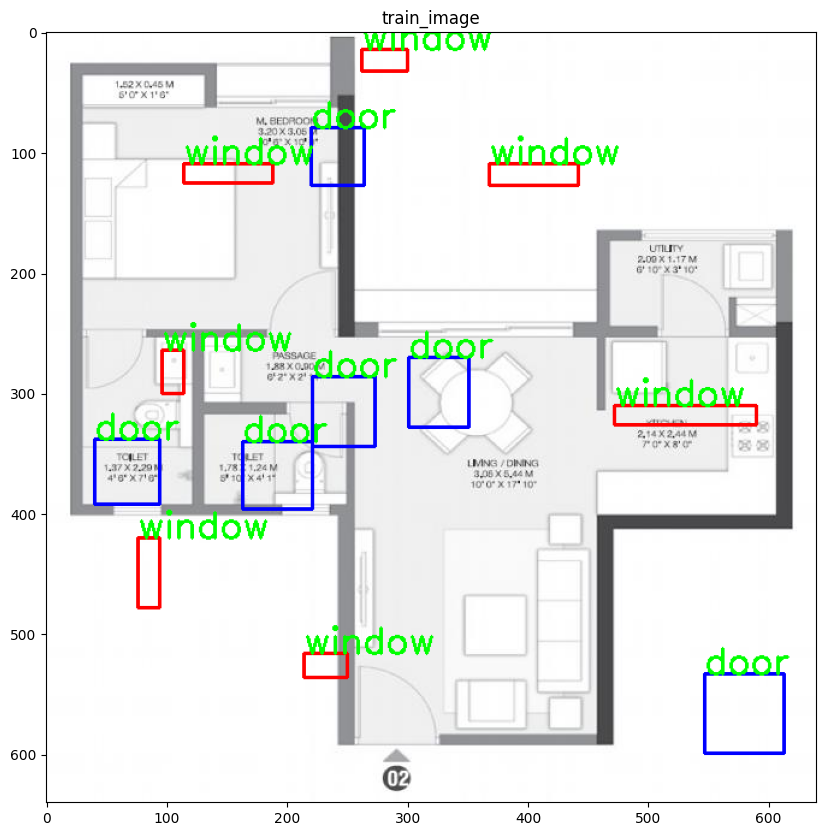

In [36]:
img = cv2.cvtColor(cv2.imread(train_images[1]), cv2.COLOR_BGR2RGB)
file = open(train_labels[1])
content = file.read().split('\n')
for i in range(len(content)):
    lst = content[i].split(' ')
    label = lst[0]

    x1, y1 = float(lst[1]) * img.shape[1], float(lst[2]) * img.shape[0]
    x2, y2 = float(lst[3]) * img.shape[1]/2, float(lst[4]) * img.shape[0]/2
    p1, p2 = (int(x1) - int(x2), int(y1) - int(y2)), (int(x1) + int(x2), int(y1) + int(y2))

    feature = ['door', 'window']

    if label=="1":
        color = (255, 0, 0)
    else:
        color = (0, 0, 255)

    img = cv2.rectangle(img, (p1),(p2), color=color, thickness=2)
    img = cv2.putText(img, feature[int(label)], p1, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # break

plt.figure(figsize=(13,10))
plt.title("train_image")
plt.imshow(img)

In [13]:
# Step 3: Run Training Script
!python train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/ML/yolo/data/data.yaml --weights yolov5s.pt --cache


2024-05-25 12:17:59.191862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 12:17:59.191933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 12:17:59.193329: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/ML/yolo/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_

In [21]:
!python val.py --data /content/drive/MyDrive/ML/yolo/data/data.yaml --weights /content/drive/MyDrive/ML/yolo/runs/train/exp7/weights/best.pt --img 640

val: data=/content/drive/MyDrive/ML/yolo/data/data.yaml, weights=['/content/drive/MyDrive/ML/yolo/runs/train/exp7/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2024-5-25 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/ML/yolo/data/images/test/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.27s/it]
                   all          9        118      0.834      0.845      0.831      0.492
                  door          9         60      0.901   

In [27]:
!python detect.py --weights /content/drive/MyDrive/ML/yolo/runs/train/exp7/weights/best.pt --source /content/drive/MyDrive/ML/yolo/data/images/test/images --img 640


detect: weights=['/content/drive/MyDrive/ML/yolo/runs/train/exp7/weights/best.pt'], source=/content/drive/MyDrive/ML/yolo/data/images/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-5-25 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/9 /content/drive/MyDrive/ML/yolo/data/images/test/images/Sample_104_png.rf.041be0cd40307b43f9c7e1ef4f8b313d.jpg: 640x640 7 doors, 1 window, 11.5ms
image 2/9 /content/drive/MyDrive/ML/yolo/data/images/test/images/Sample_106_png.rf.808d835e9efcea2c07afa482965aee94.

In [39]:
output_images = glob("/content/drive/MyDrive/ML/yolo/runs/detect/exp3/**.jpg")

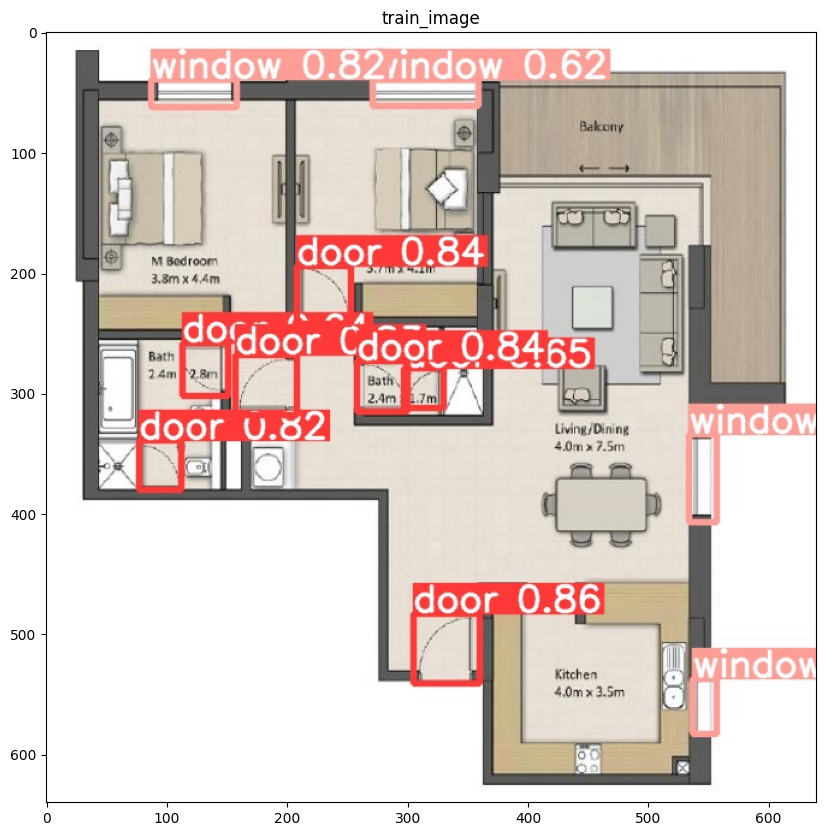

In [40]:
img = cv2.cvtColor(cv2.imread(output_images[1]), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,10))
plt.title("train_image")
plt.imshow(img)